In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pathlib

import dash
import dash as dcc
import dash as html
from dash.dependencies import Input, Output, State
from dash import dash_table
import plotly.graph_objs as go
import dash_daq as daq
from dash import Dash, dcc, html

warnings.filterwarnings('ignore')


In [2]:
def show_uniques(dataframe):
    columns_not_showed = ['Idx', 'Satisfacao', 'UltimaAvaliacao', 'HorasMensais']
    columns = dataframe.columns
    for column in columns:
        if column not in columns_not_showed:
            print(f'{column} has {dataframe[column].unique()} values.')
            
def show_boxplots(dataframe):
    dataframe_to_boxplot = dataframe[['NumProjetos', 'TempoServico', 'Saiu']]
    fig = px.box(dataframe_to_boxplot, color = 'Saiu')
    fig.show()

In [3]:
dataframe = pd.read_csv("dadosRH.csv", encoding="latin2")
dataframe.head()

,Idx,NivelSalarial,AcidenteTrabalho,Saiu,Promovido5anos,Departamento,Satisfacao,UltimaAvaliacao,NumProjetos,HorasMensais,TempoServico
0,1,Baixo,0,1,0,sales,0.38,0.53,2,157,3
1,2,Médio,0,1,0,sales,0.80,0.86,5,262,6
2,3,Médio,0,1,0,sales,0.11,0.88,7,272,4
3,4,Baixo,0,1,0,sales,0.72,0.87,5,223,5
4,5,Baixo,0,1,0,sales,0.37,0.52,2,159,3


In [41]:
dataframe.describe()

,Idx,AcidenteTrabalho,Saiu,Promovido5anos,Satisfacao,UltimaAvaliacao,NumProjetos,HorasMensais,TempoServico
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.144610,0.238083,0.021268,0.612834,0.716102,3.803054,201.050337,3.498233
std,4329.982679,0.351719,0.425924,0.144281,0.248631,0.171169,1.232592,49.943099,1.460136
min,1.000000,0.000000,0.000000,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000
25%,3750.500000,0.000000,0.000000,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000
50%,7500.000000,0.000000,0.000000,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000
75%,11249.500000,0.000000,0.000000,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000
max,14999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000


In [14]:
dataframe.isnull().sum(axis = 0)

Idx                 0
NivelSalarial       0
AcidenteTrabalho    0
Saiu                0
Promovido5anos      0
Departamento        0
Satisfacao          0
UltimaAvaliacao     0
NumProjetos         0
HorasMensais        0
TempoServico        0
dtype: int64

In [15]:
show_uniques(dataframe)

NivelSalarial has ['Baixo' 'Médio' 'Alto'] values.
AcidenteTrabalho has [0 1] values.
Saiu has [1 0] values.
Promovido5anos has [0 1] values.
Departamento has ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'] values.
NumProjetos has [2 5 7 6 4 3] values.
TempoServico has [ 3  6  4  5  2  8 10  7] values.


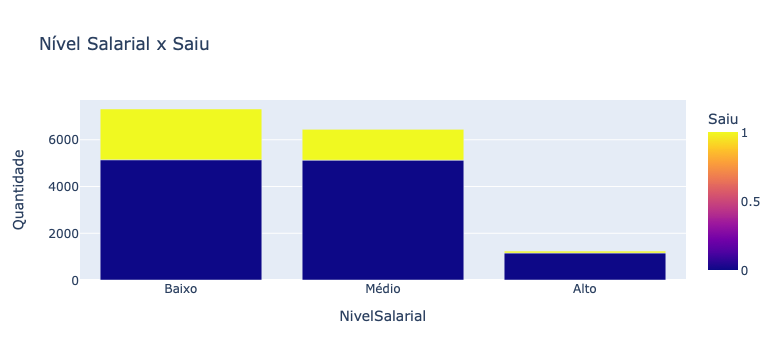

In [59]:
data2 = []

x_param = ['Baixo', 'Médio', 'Alto']
for item in range(2):
    for element in x_param:
        data2.append([element, item, dataframe.query(f'NivelSalarial=="{element}" and Saiu =={item}')['Idx'].count()])

df = pd.DataFrame(data2, columns=['NivelSalarial', 'Saiu', 'Quantidade'])
fig = px.bar(df, x="NivelSalarial", y="Quantidade", color="Saiu", title="Nível Salarial x Saiu")
fig.show()


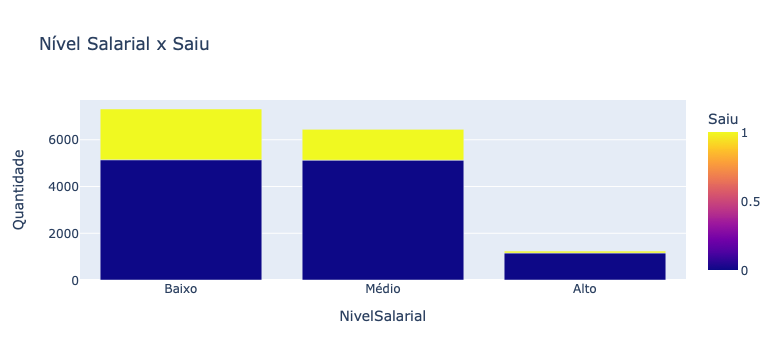

In [66]:
data2 = []

x_param = ['Baixo', 'Médio', 'Alto']
for item in range(2):
    for element in x_param:
        data2.append([element, item, dataframe.query(f'NivelSalarial=="{element}" and Saiu =={item}')['Idx'].count()])

df = pd.DataFrame(data2, columns=['NivelSalarial', 'Saiu', 'Quantidade'])
fig = px.bar(df, x="NivelSalarial", y="Quantidade", color="Saiu", title="Nível Salarial x Saiu")
fig.show()

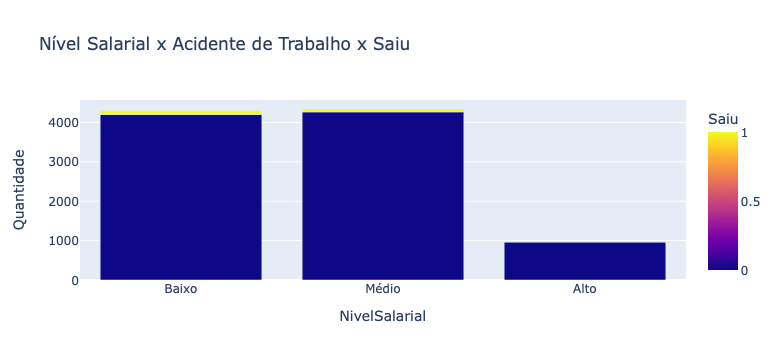

In [67]:
data2 = []

x_param = ['Baixo', 'Médio', 'Alto']
for item in range(2):
    for element in x_param:
        data2.append([element, item, dataframe.query(f'NivelSalarial=="{element}" and Saiu =={item} and AcidenteTrabalho =={item}')['Idx'].count()])

df = pd.DataFrame(data2, columns=['NivelSalarial', 'Saiu', 'Quantidade'])
fig = px.bar(df, x="NivelSalarial", y="Quantidade", color="Saiu", title="Nível Salarial x Acidente de Trabalho x Saiu")
fig.show()

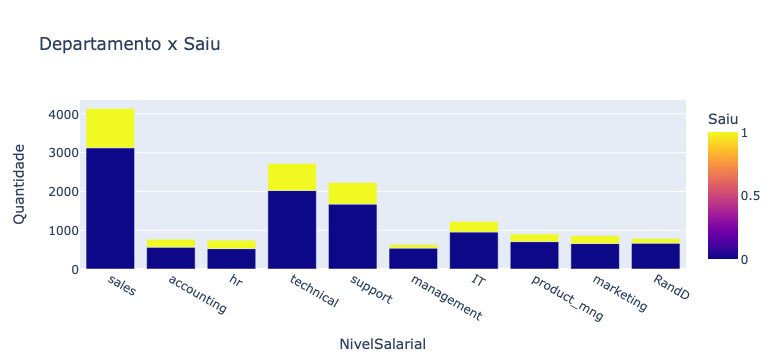

In [68]:
data2 = []

x_param = ['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']
for item in range(2):
    for element in x_param:
        data2.append([element, item, dataframe.query(f'Departamento=="{element}" and Saiu =={item}')['Idx'].count()])

df = pd.DataFrame(data2, columns=['NivelSalarial', 'Saiu', 'Quantidade'])
fig = px.bar(df, x="NivelSalarial", y="Quantidade", color="Saiu", title="Departamento x Saiu")
fig.show()



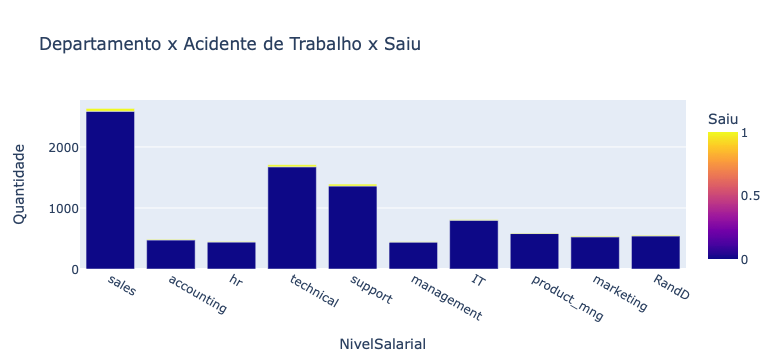

In [69]:
data2 = []

x_param = ['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']
for item in range(2):
    for element in x_param:
        data2.append([element, item, dataframe.query(f'Departamento=="{element}" and Saiu =={item} and AcidenteTrabalho =={item}')['Idx'].count()])

df = pd.DataFrame(data2, columns=['NivelSalarial', 'Saiu', 'Quantidade'])
fig = px.bar(df, x="NivelSalarial", y="Quantidade", color="Saiu", title="Departamento x Acidente de Trabalho x Saiu")
fig.show()




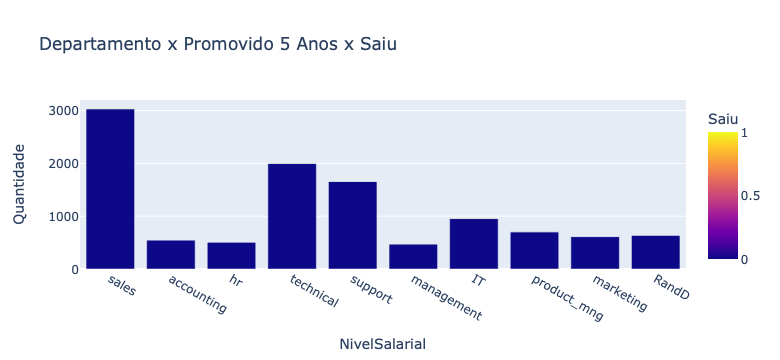

In [70]:
data2 = []

x_param = ['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']
for item in range(2):
    for element in x_param:
        data2.append([element, item, dataframe.query(f'Departamento=="{element}" and Saiu =={item} and Promovido5anos =={item}')['Idx'].count()])

df = pd.DataFrame(data2, columns=['NivelSalarial', 'Saiu', 'Quantidade'])
fig = px.bar(df, x="NivelSalarial", y="Quantidade", color="Saiu", title="Departamento x Promovido 5 Anos x Saiu")
fig.show()





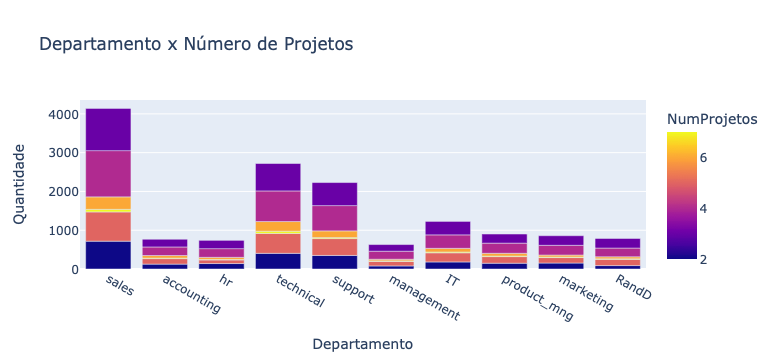

In [60]:
data2 = []

x_param = ['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']
for item in [2, 5, 7, 6, 4, 3]:
    for element in x_param:
        data2.append([element, item, dataframe.query(f'Departamento=="{element}" and NumProjetos =={item}')['Idx'].count()])

df = pd.DataFrame(data2, columns=['Departamento', 'NumProjetos', 'Quantidade'])
fig = px.bar(df, x="Departamento", y="Quantidade", color="NumProjetos", title="Departamento x Número de Projetos")
fig.show()



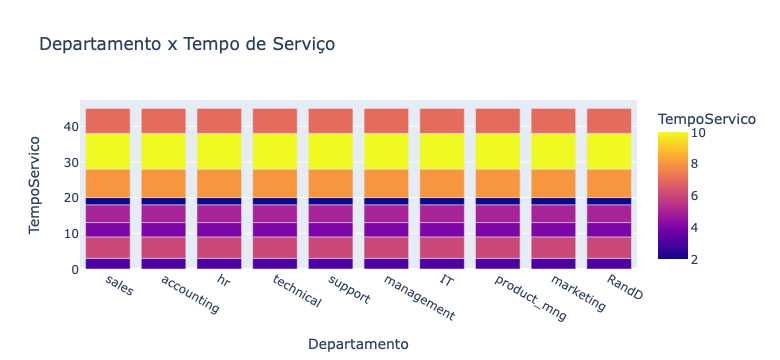

In [61]:
data2 = []

x_param = ['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']
for item in [ 3,  6,  4,  5,  2,  8, 10,  7]:
    for element in x_param:
        data2.append([element, item, dataframe.query(f'Departamento=="{element}" and TempoServico =={item}')['Idx'].count()])

df = pd.DataFrame(data2, columns=['Departamento', 'TempoServico', 'Quantidade'])
fig = px.bar(df, x="Departamento", y="TempoServico", color="TempoServico", title="Departamento x Tempo de Serviço")
fig.show()




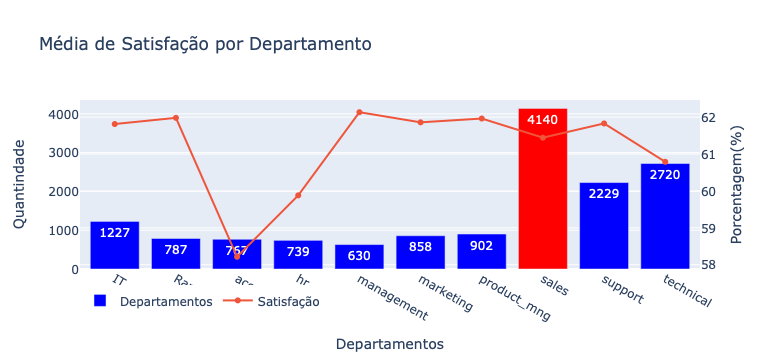

In [63]:
departamento_quantidade = dataframe.groupby('Departamento')['Departamento'].count()
satisfacao = dataframe.groupby('Departamento')['Satisfacao'].mean()*100
data = []
data.append({
    'x':departamento_quantidade.keys(),
    'y':departamento_quantidade,
    'type':'bar',
    'marker':{ 
        'color':np.where(departamento_quantidade == departamento_quantidade.max(),'red','blue')
    },
    'text':departamento_quantidade,
    'textposition':'inside',
    'name':'Departamentos'
})
data.append({
    'x':satisfacao.keys(),
    'y':satisfacao,
    'type':'scatter',
    'yaxis':'y2',
    'name':'Satisfação',
    
})
layout = {
    'title':{
        'text':'Média de Satisfação por Departamento'
    },
    'xaxis':{
        'title':'Departamentos',
        'type':'category',
        'matches':'x'
    },
    'yaxis':{
        'title':'Quantindade',
        'side':'left'
    },
    'yaxis2':{
        'title':'Porcentagem(%)',
        'side':'right',
        'overlaying': 'y',
    },
    'legend':{
        'orientation':'h'
    }
    
}
fig = go.Figure(
    data = data,
    layout=layout
)
fig

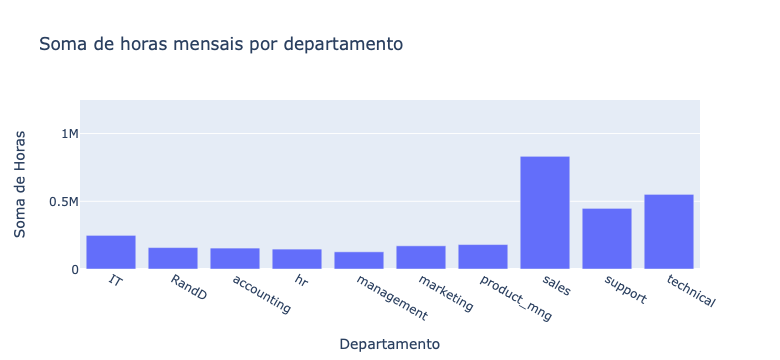

In [25]:
soma_horas_mensais = dataframe.groupby('Departamento')['HorasMensais'].sum()
data = {
    'x':soma_horas_mensais.keys(),
    'y':soma_horas_mensais,
    'type':'bar'
}
layout = {
    'title':{
        'text':'Soma de horas mensais por departamento'
    },
    'xaxis':{
        'title':'Departamento'
    },
    'yaxis':{
        'title':'Soma de Horas',
        'range':[0, max(soma_horas_mensais)*1.5]
    }
}
    
fig = go.Figure(
    data=data,
    layout=layout
)
fig

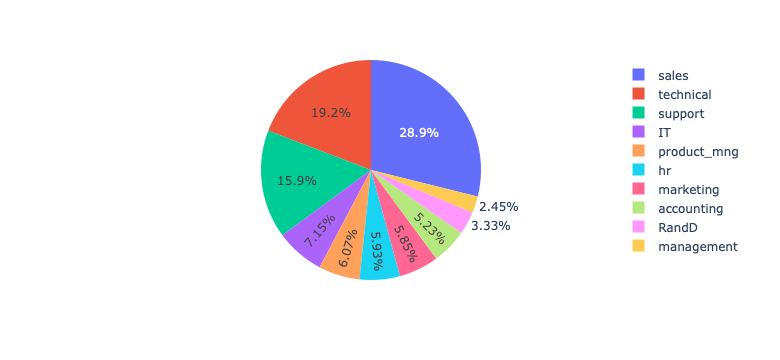

In [91]:
df = dataframe.query("Saiu == 1")
fig = px.pie(df, values='Satisfacao', names='Departamento', title='')
fig.show()

# Dashboard Report

In [20]:
#start_dashboard()

In [ ]:
app = dash.Dash(
    __name__,
    meta_tags=[{"name": "viewport", "content": "width=device-width, initial-scale=1"}],
)
app.title = "Data Visualization Dashboard"
server = app.server
app.config["suppress_callback_exceptions"] = True

suffix_row = "_row"
suffix_button_id = "_button"
suffix_sparkline_graph = "_sparkline_graph"
suffix_count = "_count"
suffix_ooc_n = "_OOC_number"
suffix_ooc_g = "_OOC_graph"
suffix_indicator = "_indicator"
max_length = len(dataframe)
params = list(dataframe)

def build_banner():
    return html.Div(
        id="banner",
        className="banner",
        children=[
            html.Div(
                id="banner-text",
                children=[
                    html.H5("Data Visualization Dashboard"),
                    html.H6("Manage Reporting"),
                ],
            ),
            html.Div(
                id="banner-logo",
                children=[
                    html.Button(
                        id="learn-more-button", children="About Noix", n_clicks=0
                    ),
                    html.A(
                        html.Img(id="logo", src=app.get_asset_url("dash-logo-new.png")),
                        href="https://plotly.com/dash/",
                    ),
                ],
            ),
        ],
    )

def build_tabs():
    return html.Div(
        id="tabs",
        className="tabs",
        children=[
            dcc.Tabs(
                id="app-tabs",
                value="tab2",
                className="custom-tabs",
                children=[
                    dcc.Tab(
                        id="Specs-tab",
                        label="Operational",
                        value="tab1",
                        className="custom-tab",
                        selected_className="custom-tab--selected",
                    ),
                    dcc.Tab(
                        id="Control-chart-tab",
                        label="Management",
                        value="tab2",
                        className="custom-tab",
                        selected_className="custom-tab--selected",
                    ),
                ],
            )
        ],
    )

def build_top_panel(stopped_interval):
    return html.Div(
        id="top-section-container",
        className="row",
        children=[
            # Metrics summary
            html.Div(
                id="metric-summary-session",
                className="eight columns",
                children=[
                    generate_section_banner("Summary"),
                    html.Div(
                        id="metric-div",
                        children=[
                            generate_metric_list_header(),
                            html.Div(
                                id="metric-rows",
                                children=[
                                    generate_metric_row_helper(stopped_interval, 6),
                                    generate_metric_row_helper(stopped_interval, 7),
                                ],
                            ),
                        ],
                    ),
                ],
            ),
            # Piechart
            html.Div(
                id="ooc-piechart-outer",
                className="four columns",
                children=[
                    generate_section_banner("% Nível Salarial"),
                    generate_piechart(),
                ],
            ),
        ],
    )


def generate_piechart():
    return dcc.Graph(
        id="piechart",
        figure={
            "data": [
                {
                    "labels": [],
                    "values": [],
                    "type": "pie",
                    "marker": {"line": {"color": "white", "width": 1}},
                    "hoverinfo": "label",
                    "textinfo": "label",
                }
            ],
            "layout": {
                "margin": dict(l=20, r=20, t=20, b=20),
                "showlegend": True,
                "paper_bgcolor": "rgba(0,0,0,0)",
                "plot_bgcolor": "rgba(0,0,0,0)",
                "font": {"color": "white"},
                "autosize": True,
            },
        },
    )

def generate_section_banner(title):
    return html.Div(className="section-banner", children=title)

# Build header
def generate_metric_list_header():
    return generate_metric_row(
        "metric_header",
        {"height": "4rem", "margin": "1rem 0", "textAlign": "center"},
        {"id": "m_header_1", "children": html.Div("Parameter")},
        {"id": "m_header_2", "children": html.Div("Mean")},
        {"id": "m_header_3", "children": html.Div("Sparkline")},
    )

def generate_metric_row_helper(stopped_interval, index):
    item = params[index]
    div_id = item + suffix_row
    button_id = item + suffix_button_id
    sparkline_graph_id = item + suffix_sparkline_graph
    count_id = item + suffix_count
    ooc_percentage_id = item + suffix_ooc_n
    ooc_graph_id = item + suffix_ooc_g
    indicator_id = item + suffix_indicator

    return generate_metric_row(
        div_id,
        None,
        {
            "id": item,
            "className": "metric-row-button-text",
            "children": html.Button(
                id=button_id,
                className="metric-row-button",
                children=item,
                title="Click to visualize live SPC chart",
                n_clicks=0,
            ),
        },
        {"id": count_id, "children": dataframe[item].mean()},
        {
            "id": item + "_sparkline",
            
        },
    )


def generate_metric_row(id, style, col1, col2, col3):
    if style is None:
        style = {"height": "8rem", "width": "100%"}

    return html.Div(
        id=id,
        className="row metric-row",
        style=style,
        children=[
            html.Div(
                id=col1["id"],
                className="one column",
                style={"margin-right": "2.5rem", "minWidth": "50px"},
                children=col1["children"],
            ),
            html.Div(
                id=col2["id"],
                style={"textAlign": "center"},
                className="one column",
                children=col2["children"],
            ),
            html.Div(
                id=col3["id"],
                style={"height": "100%"},
                className="four columns",
                #children=col3["children"],
            ),
        ],
    )

def build_chart_panel():
    return html.Div(
        id="control-chart-container",
        className="twelve columns",
        children=[
        ],
    )

def build_tab_1():
    return [
        # Manually select metrics
        html.Div(
            id="set-specs-intro-container",
            # className='twelve columns',
            children=html.P(
                "Filter with a value."
            ),
        ),
        html.Div(
            id="settings-menu",
            children=[
                html.Div(
                    id="metric-select-menu",
                    # className='five columns',
                    children=[
                        html.Label(id="metric-select-title", children="Choose"),
                        html.Br(),
                        dcc.Dropdown(
                            id="metric-select-dropdown",
                            options=list(
                                {"label": param, "value": param} for param in params[1:]
                            ),
                            value=params[1],
                        ),
                    ],
                ),
                html.Div([
                    # className='six columns',
                    dcc.Graph(id='value-setter-panel'),
                    html.Br(),
                ], id="value-setter-menu"),
            ],
        ),
    ]

def populate_ooc(data, ucl, lcl):
    ooc_count = 0
    ret = []
    for i in range(len(data)):
        if data[i] >= ucl or data[i] <= lcl:
            ooc_count += 1
            ret.append(ooc_count / (i + 1))
        else:
            ret.append(ooc_count / (i + 1))
    return ret

def init_df():
    ret = {}

    return ret

state_dict = init_df()

def init_value_setter_store():
    # Initialize store data
    state_dict = init_df()
    return state_dict

def build_quick_stats_panel():
    return html.Div(
        id="quick-stats",
        className="row",
        children=[
            html.Div(
                id="card-1",
                children=[
                    html.P("Registros"),
                    daq.LEDDisplay(
                        id="operator-led",
                        value=len(dataframe),
                        color="#92e0d3",
                        backgroundColor="#1e2130",
                        size=50,
                    ),
                ],
            ),
            #html.Div(
            #    id="card-2",
            #    children=[
            #        html.P("Time to completion"),
            #        daq.Gauge(
            #            id="progress-gauge",
            #            max=max_length * 2,
            #            min=0,
            #            showCurrentValue=True,  # default size 200 pixel
            #        ),
            #    ],
            #),
            #html.Div(
            #    id="utility-card",
            #    children=[daq.StopButton(id="stop-button", size=160, n_clicks=0)],
            #),
        ],
    )

def generate_modal():
    return html.Div(
        id="markdown",
        className="modal",
        children=(
            html.Div(
                id="markdown-container",
                className="markdown-container",
                children=[
                    html.Div(
                        className="close-container",
                        children=html.Button(
                            "Close",
                            id="markdown_close",
                            n_clicks=0,
                            className="closeButton",
                        ),
                    ),
                    html.Div(
                        className="markdown-text",
                        children=dcc.Markdown(
                            children=(
                                """
                        ###### Sobre o que é este Dashboard?

                        Este dashboard é parte da disciplina de visualização de dados.

                        ###### Quem somos nós?

                        Fagner Candido
                        
                        Zaqueu Mussinda
                        
                        Paulo Rodrigues
                        
                        Marco Gandarez

                        ###### Código fonte

                        Abuse e use
                    """
                            )
                        ),
                    ),
                ],
            )
        ),
    )

app.layout = html.Div(
    id="big-app-container",
    children=[
        build_banner(),
        dcc.Interval(
            id="interval-component",
            interval=2 * 1000,  # in milliseconds
            n_intervals=50,  # start at batch 50
            disabled=True,
        ),
        html.Div(
            id="app-container",
            children=[
                build_tabs(),
                # Main app
                html.Div(id="app-content"),
            ],
        ),
        dcc.Store(id="value-setter-store", data=init_value_setter_store()),
        dcc.Store(id="n-interval-stage", data=50),
        generate_modal(),
    ],
)

# Update piechart
@app.callback(
    output=Output("piechart", "figure"),
    inputs=[Input("interval-component", "n_intervals")],
    state=[State("value-setter-store", "data")],
)
def update_piechart(interval, stored_data):
    nivel_salarial_qtd = dataframe.groupby('NivelSalarial')['NivelSalarial'].count()
    if interval == 0:
        return {
            "data": [],
            "layout": {
                "font": {"color": "white"},
                "paper_bgcolor": "rgba(0,0,0,0)",
                "plot_bgcolor": "rgba(0,0,0,0)",
            },
        }

    if interval >= max_length:
        total_count = max_length - 1
    else:
        total_count = interval - 1

    values = []
    colors = []
    new_figure = {
        "data": [
            {
                'labels':nivel_salarial_qtd.keys(),
                'values':nivel_salarial_qtd,
                "type": "pie",
                "marker": {"colors": colors, "line": dict(color="white", width=2)},
                "hoverinfo": "label",
                "textinfo": "label",
            }
        ],
        "layout": {
            "margin": dict(t=20, b=50),
            "uirevision": True,
            "font": {"color": "white"},
            "showlegend": False,
            "paper_bgcolor": "rgba(0,0,0,0)",
            "plot_bgcolor": "rgba(0,0,0,0)",
            "autosize": True,
        },
    }
    return new_figure

@app.callback(
    [Output("app-content", "children"), Output("interval-component", "n_intervals")],
    [Input("app-tabs", "value")],
    [State("n-interval-stage", "data")],
)
def render_tab_content(tab_switch, stopped_interval):
    if tab_switch == "tab1":
        return build_tab_1(), stopped_interval
    return (
        html.Div(
            id="status-container",
            children=[
                build_quick_stats_panel(),
                html.Div(
                    id="graphs-container",
                    children=[build_top_panel(stopped_interval), build_chart_panel()],
                ),
            ],
        ),
        stopped_interval,
    )

# Update interval
@app.callback(
    Output("n-interval-stage", "data"),
    [Input("app-tabs", "value")],
    [
        State("interval-component", "n_intervals"),
        State("interval-component", "disabled"),
        State("n-interval-stage", "data"),
    ],
)
def update_interval_state(tab_switch, cur_interval, disabled, cur_stage):
    if disabled:
        return cur_interval

    if tab_switch == "tab1":
        return cur_interval
    return cur_stage

@app.callback(
    Output("markdown", "style"),
    [Input("learn-more-button", "n_clicks"), Input("markdown_close", "n_clicks")],
)
def update_click_output(button_click, close_click):
    ctx = dash.callback_context

    if ctx.triggered:
        prop_id = ctx.triggered[0]["prop_id"].split(".")[0]
        if prop_id == "learn-more-button":
            return {"display": "block"}

    return {"display": "none"}

@app.callback(
    Output("value-setter-panel", "figure"),
    [Input("metric-select-dropdown", "value")],
    [State("value-setter-store", "data")],
)
def build_value_setter_panel(dd_select, state_value):
    return px.pie(dataframe.query("Saiu == 1"), values=dd_select, names='Departamento', title='')

# Start Server
if __name__ == "__main__":
    app.run_server(port = 9050)

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is run

 * Running on http://127.0.0.1:9050/ (Press CTRL+C to quit)
127.0.0.1 - - [03/Jun/2022 17:15:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2022 17:15:26] "GET /_dash-component-suites/dash/dcc/async-highlight.js HTTP/1.1" 304 -
127.0.0.1 - - [03/Jun/2022 17:15:26] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [03/Jun/2022 17:15:26] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [03/Jun/2022 17:15:26] "GET /_dash-component-suites/dash/dcc/async-markdown.js HTTP/1.1" 304 -
127.0.0.1 - - [03/Jun/2022 17:15:26] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [03/Jun/2022 17:15:26] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2022 17:15:26] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2022 17:15:26] "GET /_dash-component-suites/dash/dcc/async-markdown.js HTTP/1.1" 304 -
127.0.0.1 - - [03/Jun/2022 17:15:27] "POST /_dash-update-component HTTP/1.1" 2